In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

# 당뇨병 데이터 파일 로드

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


# 산점도와 선형회귀직선

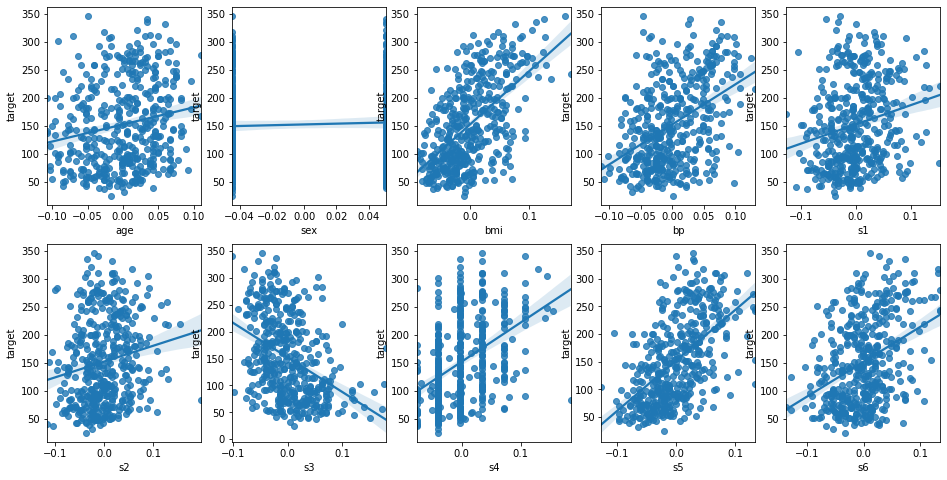

In [29]:
fig, axs = plt.subplots(figsize=(16,8), ncols=5, nrows=2)
features = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
for i, feature in enumerate(features):
    row, col = i // 5, i % 5
    sns.regplot(x=feature, y='target',data=df,ax=axs[row][col])

# scikit-learn으로 예측

In [13]:
# 필요한 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
for features in diabetes.feature_names:
    X = df[features].values.reshape(-1,1)
    y = diabetes.target
    lr = LinearRegression()  # 선형 회귀 모델을 가지고 오고 
    lr.fit(X,y) # 학습 데이터를 이용해서 모델을 학습 시킴
    r2 = lr.score(X,y)
    print(f'{features}: {r2:.4f}')
    # bmi이 target과 상관관계가 높음.

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


# 다중선형회귀

H(x)= Wx + b
 
여기서 H를 우리는 앞으로 가설(Hypothesis) 을 의미한다 할 것이며, W는 가중치(Weight) 라고 부르며, b는 편향(bias) 라고 말할 것이다.
예측값들과 정답이 대체로 멀리 떨어져 있으며, 결과의 편향(bias)가 높다고 말하고, 예측값들이 자기들끼리 대체로 멀리 흩어져있으면, 결과의 분산(variance)가 높다고 말한다.
가장 적합한 선(가장 적합한 선형모델)을 그으려면?
 Linear Regression 방식을 사용하는 것이다. 여기서 사용될 개념이 최소 평균 제곱근 오차(Minimum Mean Square Error(MMSE)) 이다.

Error = H(x) - y : 예측값H(X)(직선모델) - 실제값y(실제 데이터의 y값)
Square Error = Error를 제곱한 값 = (H(x) - y)^2
Mean Square Error = Square Error를 다 더해서 n으로 나누어 평균낸 값 = 오차함수
이 개념(Mean Square Error : MSE)를 이용하여, Best한 선형 모델을 그을 것이다.
이 과정에서 사용되는 것이 경사하강법(Gradient Descent) 이다. 그리고 이 알고리즘을 사용하기 위해, 알아야할 개념인 Cost Function이 Mean Square Error와 같은 것 을 위에서 확인 할 수가 있다. 그리고 이 Cost Function을 최소 로 만드는 개념이 Minimum Mean Square Error 일 것이다.

# - train/test 분리(test_size = 0.1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

# - LinearRegression 모델

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [38]:
# Weight
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [39]:
# Bias
lr.intercept_

151.67372554450927

In [40]:
weight, bias = lr.coef_,lr.intercept_
weight

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

# DecisionTreeRegressor 모델

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2021)
dtr.fit(X_train, y_train)
pred_dt = dtr.predict(X_test)

# - 결과 비교

In [42]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_dt = mean_squared_error(y_test, pred_dt)
print(f'MSE - LR: {mse_lr:.4f}, DTR: {mse_dt:.4f}')
# 평균 제곱 오차의 루트를 통해서 테스트 데이터에서의 모델 성능 판단

MSE - LR: 2370.1979, DTR: 6832.3111


In [43]:
y_test.shape, pred_lr.shape, pred_dt.shape

((45,), (45,), (45,))

In [44]:
res = pd.DataFrame({
    'y_test': y_test, 'lr': pred_lr, 'dt': pred_dt
})
res.head(10)

,y_test,lr,dt
0,155.0,156.031216,127.0
1,167.0,185.700495,127.0
2,185.0,162.863840,206.0
3,109.0,162.545441,142.0
4,65.0,78.518494,127.0
5,77.0,60.600694,75.0
6,277.0,175.198247,168.0
7,244.0,176.770871,144.0
8,148.0,131.425197,118.0
9,102.0,88.053772,214.0


In [25]:
y_test_predict = model.predict(X_test)  # 학습시킨 모델로 예측